# CS-260 Final Project - Fall 2023

Taylor DeStefano, Nicole Imbriano, and Glenn Rice


In [ ]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import folium

In [ ]:
try:
  titles = pd.read_csv('titles.csv')
  titles = titles.dropna(axis = 'columns', how = 'all')

  conn = sql.connect('titles.db')
  titles.to_sql('titles', conn)
except sql.Error as error:
  print("Issues Creating Database/Connection")
  print(error)

In [ ]:
try:
  credits = pd.read_csv('credits.csv')
  credits = credits.dropna(axis = 'columns', how = 'all')

  conn = sql.connect('credits.db')
  titles.to_sql('credits', conn)
except sql.Error as error:
  print("Issues Creating Database/Connection")
  print(error)

## 1. Introduction

For our final project, we chose to explore Netflix and the movies and TV shows that they offer. The information that we gathered ranges from the title's release year, its age certification, runtime, ratings, and more. Our data encompasses nearly 6,000 different titles, and we look to answer the following questions:

How do TMDB scores compare to IMDb scores?

What is the relationship between runtime and IMDb score for shows on Netflix?

What is the relationship between the number of seasons and the IMDB score for TV shows?

How many shows fall into different age certification categories?

How strong is the correlation between age certification and IMDb score?

What is the distribution of runtimes for movies on Netflix?

What are the top production countries for Netflix content outside of the US?

How does the runtime vary by the release year of the movie?

# 2. Data

## 2.1 Variables

In [ ]:
sql_statement = """
                SELECT  *
                FROM    titles
                """

titles_all = pd.read_sql_query(sql_statement, conn)
titles_all

In [ ]:
sql_statement = """
                SELECT  *
                FROM    credits
                """

credits_all = pd.read_sql_query(sql_statement, conn)
credits_all

Link to Dataset: [Netflix TV Shows and Movies](https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies?select=titles.csv)

The data was collected from JustWatch and Kaggle and was uploaded by the creator on July 26th, 2022. The creator used web scraping methods by using Python packages in order to obtain the data to organize and later analyze.

The data is two comprehensive datasets of all shows available on Netflix in the United States at the time of collection. Our datasets have a usability score of 10.00 on Kaggle, attesting to the validity and reliability of our data.

There are two csv files in the dataset:
> **Titles.csv** has 15 columns and 5,851 rows

> **Credits.csv** has 5 columns and 77,802 rows




## 2.2 Data Types

**titles.csv** has 15 different columns, each explained below:


*   **id** - contains the movie or show ID
*   **title** - contains the name of the movie or show
*   **type** - denotes whether the title is a movie or a tv show
*   **description** - contains a description of the movie or show
*   **release_year** - contains the release year of the movie or show
*   **age_certification** - contains the age certification of the movie or show
*   **runtime** - contains the runtime of the entire movie or the average runtime of an episode
*   **genres** - contains the genre of the movie or show
*   **production_countries** - contains the production country or countries of the movie or show
*   **seasons** - contains the number of season of the show (null if title is a movie)
*   **imdb_id** - contains the IMDB id
*   **imdb_score** - contains the IMDB score of the movie or show
*   **imdb_votes** - contains the IMDB votes of the movie or show
*   **tmdb_popularity** - contains the TMDB popularity of the movie or show
*   **tmdb_score** - contains the TMDB score of the movie or show



**credits.csv** has 5 different columns, each explained below:


*   **person_id** - contains a unique ID for each person
*   **id** - contains an ID for each movie or show title
*   **name** - contains the name of the person in the table
*   **character** - contains the name of the character in the title (null if non-cast)
*   **role** - contains the role a person palyed in the title



# 3. Analysis Questions

##How do TMDB scores compare to IMDb scores? (Glenn)

###Code

In [ ]:
score_cor = """
            SELECT title, imdb_score, tmdb_score
            FROM titles
            WHERE imdb_score <> "NaN" AND tmdb_score <> "NaN"
            limit 200
            """
score_cor = pd.read_sql_query(score_cor, conn)
score_cor

,title,imdb_score,tmdb_score
0,Taxi Driver,8.2,8.179
1,Deliverance,7.7,7.300
2,Monty Python and the Holy Grail,8.2,7.811
3,The Dirty Dozen,7.7,7.600
4,Monty Python's Flying Circus,8.8,8.306
...,...,...,...
195,The Other,5.9,5.900
196,Yodha,4.5,5.000
197,The Emigrant,6.5,6.000
198,Hello Brother,4.6,5.300


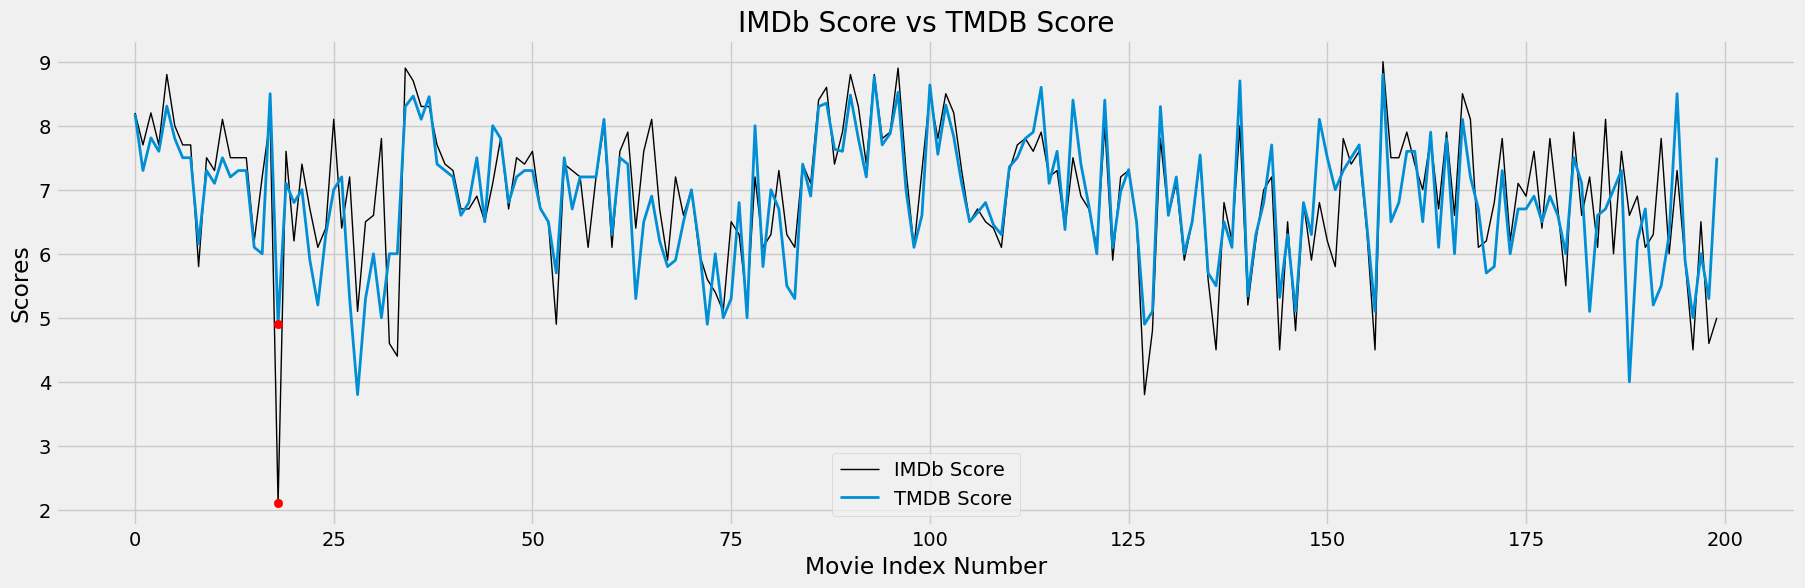

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(score_cor["imdb_score"], label="IMDb Score", color = "black", linewidth = 1)
plt.plot(score_cor["tmdb_score"], label="TMDB Score", linewidth = 2)
plt.title("IMDb Score vs TMDB Score")
plt.xlabel('Movie Index Number')
plt.ylabel('Scores')
plt.yticks(np.arange(0,10))
plt.legend(loc='lower center')
plt.scatter(18, 2.1, marker = 'o', color = 'red', zorder = 2)
plt.scatter(18, 4.9, marker = 'o', color = 'red', zorder = 2)

In [ ]:
score_cor2 = """
            SELECT title, imdb_score, tmdb_score
            FROM titles
            WHERE title = "Dostana"
            LIMIT 1
            """ #There are two movies that have the same title, the one is a remake
score_cor2 = pd.read_sql_query(score_cor2, conn)
score_cor2

,title,imdb_score,tmdb_score
0,Dostana,2.1,4.9


In [ ]:
coefficient = score_cor.corr()
coefficient

<ipython-input-10-b2e79a4bc229>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coefficient = score_cor.corr()


,imdb_score,tmdb_score
imdb_score,1.000000,0.768331
tmdb_score,0.768331,1.000000


###Analysis

This question was created to examine the differences betweeen IMDb scores and TMDB scores. A line graph was created to visualize how each of the two ratings compared to one another. The X-axis consists of the movie index number, and the Y-axis is the scores themselves. They are both on a ten point scale.

It is clear just by looking at the graph that the two scores at least have some sort of correlation with each other, as they are typically plotted in pretty similar spots, with an exception being movie "Dostana", which is marked on the graph. There is a clear difference in score on that title, but other than that there is nothing signifantly notable. In order to find the actual correlation between the two types of scores a correlation was run to find a value of 0.768331. There are four categories that the correlation coefficient can fall between: No Correlation at 0.0, Low Positive Correlation at 0.3, High Positive Correlation at 0.8, and Perfect Positive Correlation at 1.0. The same is true for negative correlation, but the numbers are mirrored as a negative number.

The correlation coefficient indicates that IMDb scores and TMDB scores are have a low positive correlation, but very close to having a high positive correlation. It makes sense that these two scores are moderatley correlated because they are created by people's opinions. Everyone's opinion varies somewhat, but there are universal factors that are key to a good movie. The combination of the scoring being subjective and there are common factors when making a good movie would back up the findings that the scores are moderately, positively correlated.

## What is the relationship between runtime and IMDb score for shows on Netflix? (Taylor)

### Code

In [ ]:
sql_statement = """
                SELECT  *
                FROM    titles
                WHERE   type IS 'SHOW'
                """

titles_all = pd.read_sql_query(sql_statement, conn)
titles_all

In [ ]:
plt.scatter(titles_all['runtime'], titles_all['imdb_score'])
plt.title('TV Show Runtime (minutes) vs. IMDB score')
plt.xlabel('runtime')
plt.ylabel('imdb_score')


### Analysis

In this chart we asked the question: Is there a relationship between a TV Show's runtime and its score on IMDB.

Each show was plotted on the scatterplot based on it's runtime (in minutes) and individual IMDB score.

From this scatterplot, we are able to see that there doesn't appear to be a clear correlation between the two, with a major cluster across the <75 minutes section of the graph.

## What is the relationship between the number of seasons and the IMDB score for TV shows? (Taylor)

### Code

In [ ]:
sql_statement = """
                SELECT    COUNT(id), imdb_score
                FROM      titles
                WHERE     type is 'SHOW' AND imdb_score IS NOT NULL AND seasons = 1.0
                GROUP BY  imdb_score
                """

show_titles = pd.read_sql_query(sql_statement, conn)
show_titles

In [ ]:
plt.bar(show_titles['imdb_score'], show_titles['COUNT(id)'])
plt.title('Number of Shows per IMDB Score (1 Season)')
plt.xlabel('IMDB Score')
plt.xlim(0, 10)
plt.ylabel('Number of Shows')


In [ ]:
sql_statement = """
                SELECT    COUNT(id), imdb_score
                FROM      titles
                WHERE     type is 'SHOW' AND imdb_score IS NOT NULL AND seasons != 1.0
                GROUP BY  imdb_score
                """

show_titles = pd.read_sql_query(sql_statement, conn)
show_titles

In [ ]:
plt.bar(show_titles['imdb_score'], show_titles['COUNT(id)'])
plt.title('Number of Shows per IMDB Score (Multiple Seasons)')
plt.xlabel('IMDB Score')
plt.xlim(0, 10)
plt.ylabel('Number of Shows')

###Analysis

In this chart, we initially attempted to see if there was a correlation between the number of shows and the IMDB score listed on the dataset, however, due to the large amount of data we needed to divide up the data into two graphs -- Shows with a single season vs shows with multiple seasons -- in order to see a clearer graph.

From this first graph (Shows with 1 Season), we are able to see a clear curve of the scores, with a majority of the shows landing an IMDB score between ~5-8. Of the 1,084 shows that only have a single season on Netflix, the average IMDB score is a 6.87.

From the second graph (Shows with Multiple Seasons), we are able to see a similar distribution, however there is a higher average than the shows with a single season. Of the 855	shows with more than one season on Netflix, the average IMDB score is a 7.1.

From these two graphs, we are able to see that there is a slightly higher IMDB score average for shows with multiple seasons than there is for shows with a single season on Netflix.

## How many shows fall into different age certification categories? (Taylor)

### Code

In [ ]:
sql_statement = """
                SELECT
                    CASE
                        WHEN  age_certification IS NULL THEN 'UNRATED'
                        ELSE  age_certification
                      END rating,
                   COUNT(title)
                FROM        titles
                WHERE       type IS 'SHOW'
                GROUP BY    age_certification
                """

titles_rating = pd.read_sql_query(sql_statement, conn)
titles_rating

In [ ]:
plt.bar(titles_rating['rating'], titles_rating['COUNT(title)'])
plt.xticks(rotation = 90)
plt.title('Shows in Each Rating Category')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')


### Analysis

In this graph we asked which age certification rating category had the most shows. These ratings create a guideline for who the content is aimed for and are as follows: TV-Y for children, TV-Y7 for older children, TV-G for general audiences, TV-PG for parental guidance, TV-14 for parents strongly cautioned, and TV-MA for mature audiences. There are also a number shows that were not given a rating, and these were given an 'UNRATED' category for the purposes of the graph.

From this graph we are able to see that TV-MA is the rating given to the most shows on Netflix, with 883 shows having this rating. This is followed by TV-14, with 474 shows; UNRATED, with 255 shows; TV-PG, with 188 shows; TV-Y7, with 120 shows; TV-Y with 107; and finally TV-G, with 79 shows.

This shows that a majority of the content on Netflix is geared towards an older audience, with only a small minority geared towards children.

##How strong is the correlation between age certification and IMDb score? (Glenn)

###Code

In [ ]:
certification_index= """
                SELECT distinct(age_certification)
                FROM titles
                """
certification_index = pd.read_sql_query(certification_index, conn)
certification_index

,age_certification
0,TV-MA
1,R
2,PG
3,None
4,TV-14
5,PG-13
6,TV-PG
7,TV-Y
8,TV-G
9,TV-Y7


In [ ]:
certification_cor =  """
                      SELECT title, age_certification, imdb_score,
                      CASE
                        WHEN age_certification = 'TV-MA' THEN 0
                        WHEN age_certification = 'R' THEN 1
                        WHEN age_certification = 'PG' THEN 2
                        WHEN age_certification = 'None' THEN 3
                        WHEN age_certification = 'TV-14' THEN 4
                        WHEN age_certification = 'PG-13' THEN 5
                        WHEN age_certification = 'TV-PG' THEN 6
                        WHEN age_certification = 'TV-Y' THEN 7
                        WHEN age_certification = 'TV-G' THEN 8
                        WHEN age_certification = 'TV-Y7' THEN 9
                        WHEN age_certification = 'G' THEN 10
                        WHEN age_certification = 'NC-17' THEN 11
                      END age_certification_indexnum
                      FROM titles
                      WHERE age_certification <> "NaN" AND tmdb_score <> "NaN"
                      """
certification_cor = pd.read_sql_query(certification_cor, conn)
certification_cor

,title,age_certification,imdb_score,age_certification_indexnum
0,Taxi Driver,R,8.2,1
1,Deliverance,R,7.7,1
2,Monty Python and the Holy Grail,PG,8.2,2
3,Monty Python's Flying Circus,TV-14,8.8,4
4,Life of Brian,R,8.0,1
...,...,...,...,...
3103,Stuck Apart,R,6.0,1
3104,We Are: The Brooklyn Saints,TV-14,6.5,4
3105,Alma Matters: Inside the IIT Dream,TV-MA,8.3,0
3106,Pitta Kathalu,TV-MA,5.1,0


Text(0, 0.5, 'IMDb Score')

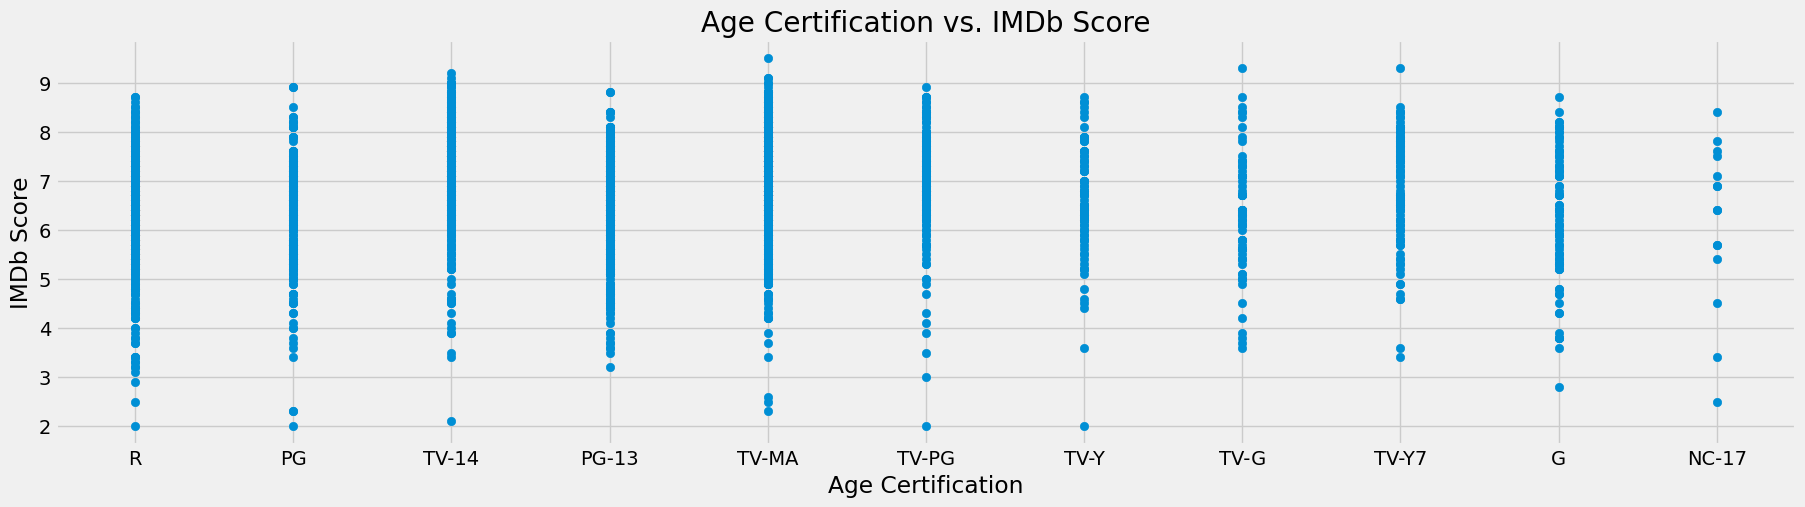

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(certification_cor['age_certification'],certification_cor['imdb_score'])
plt.title('Age Certification vs. IMDb Score')
plt.xlabel('Age Certification')
plt.ylabel('IMDb Score')

In [ ]:
certification_coef = certification_cor.corr()
certification_coef

<ipython-input-13-c00781921c6d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  certification_coef = certification_cor.corr()


,imdb_score,age_certification_indexnum
imdb_score,1.000000,-0.061592
age_certification_indexnum,-0.061592,1.000000


###Analysis

The point of this graph was to explore weather or not there is a strong correlation between a movie's IMDb score and its age certification. To answer this question, a scatterplot was utilized to drop each movie title into a bucket of their age certification relative to their IMDb score. From this graph, the correlation between IMDb score and age certification had a result of about -.06. There are four categories that the correlation coefficient can fall between: No Correlation at 0.0, Low Negative Correlation at -0.3, High Negative Correlation at -0.8, and Perfect Negative Correlation at -1.0. The same is true for positive correlation, but the numbers are mirrored as a positive number.

Because our correlation coefficient does not come close to approaching even a low negative correlation at -0.3, we can determine that the age certification has almost no correltion in how the movie is going to be scored. This is an interesting discovery because it could be percieved that the higher the age cerification, the more freedom a director has with the type of content they are able to produce, leading to better IMDb scores. According do our data, that is not the case.

##What is the distribution of runtimes for movies on Netflix? (Nicole)


###Code

In [ ]:

sql_statement = """
                SELECT  *
                FROM    titles
                WHERE   type IS 'MOVIE' AND type IS NOT NULL AND runtime IS NOT NULL
                """

titles_all = pd.read_sql_query(sql_statement, conn)
titles_all

In [ ]:
counts, bins, patches =plt.hist(titles_all['runtime'], bins=np.arange(0, 226, 25), edgecolor='black')
plt.title('Distribution of Runtime for Movies on Netflix')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 226, 25))
plt.yticks(np.arange(0, 1201, 200))

for count, bin, patch in zip(counts, bins, patches):
    plt.text(bin + patch.get_width()/2, count, str(int(count)), ha='center', va='bottom')

plt.show()

###Analysis

To answer this question, a histogram was created to show the distribution of runtimes for movies on netflix. The x-axis shows the runtime in minutes and the y-axis shows the frequency. There are 1273 movies with a runtime between 75 and 100 minutes, and 1176 movies with a runtime between 100 and 125 minutes. This shows that the majority of titles (2449) have a runtime between 75 and 125 minutes. The histogram is a bell shaped histogram with most of the data concentrated in the middle and almost evenly tapering off to both sides.



##What are the top production countries for Netflix content outside of the US? (Nicole)


###Code

In [ ]:
sql_statement = """
                SELECT production_countries, COUNT(title) AS count
                FROM titles
                WHERE NOT production_countries = '[]'
                GROUP BY production_countries
                HAVING COUNT(title) < 600 -- Filter for groups with less than 600 titles
                ORDER BY count DESC
                LIMIT 10;
                """

titles_all = pd.read_sql_query(sql_statement, conn)
titles_all

In [ ]:
plt.figure(figsize=(12, 8))
bars = plt.bar(titles_all["production_countries"], titles_all["count"])
plt.ylabel("Number of Titles")
plt.title("Top Production Countries of Netflix Content Outside of the US")
plt.xticks(fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, str(height), ha="center", va="bottom")

plt.show()

###Analysis

To answer this question, a bar graph was created to show the top production countries outside of the US. The United States was not included in this bar graph because the overwhelming majority of content on Netflix was produced in the US.  First, a query was run to find the number of titles that were produced in each country excluding the US. The number of titles were grouped by country, and limited to the top 10 countries with the most number of titles. The x-axis shows the countries and the y-axis shows the number of titles. The countries are ordered from highest to lowest number of titles. India is the top production country outside of the United States with 599 titles, followed by the UK with 264 titles and Japan with 222 titles.



##How does the runtime vary by the release year of the movie? (Nicole)



###Code

In [ ]:
sql_statement = """
                SELECT AVG(runtime) AS avg_runtime, release_year
                FROM titles
                WHERE type = 'MOVIE'
                GROUP BY release_year
                ORDER BY release_year;
                """

titles_all = pd.read_sql_query(sql_statement, conn)
titles_all

In [ ]:
a, b = np.polyfit(titles_all["release_year"], titles_all["avg_runtime"], 1)

plt.scatter(titles_all["release_year"], titles_all["avg_runtime"])
plt.plot(titles_all["release_year"], a*titles_all["release_year"] + b, color='red',linewidth=2)
plt.xlabel("Release Year")
plt.ylabel("Average Runtime")
plt.title("Release Year and Average Runtime for Movies")

plt.show()

###Analysis

To answer this question, a scatter plot with a line graph was created to show the relationship between the average runtime and the release year of the movie. The x-axis shows the release years for movies, ranging from 1960 to 2020. Each point plotted represents the average run time of all the movies released in that specific year. The y-axis shows the average runtime for movies, ranging from 80 minutes to 180 minutes. The trend line is red and suggests that the average runtime for movies has decreased over time. The data points are blue and are scattered around the trend line. Throughout 1960 and 2000, movie runtimes varied more but averaged around 120 minutes. From 2005 to 2020, the average runtime of movies in each year was below 120 minutes.

# Conclusion

From the data we analyzed, we were able to answer many different questions about the TV shows and movies that are available on Netflix. For example, we were able to see different relationships between IMDB scores and show runtimes and amount of seasons, runtime distributions, TMDB vs IMDB scores, age certification distributions, which country produced the most titles, as well as variations in movie runtimes.

We found out that there is a low positive correlation between TMDB and IMDB scores for the titles on Netflix, which lead us to believe that while opinions may vary slightly, the majority of people are able to agree on a movie rating.

We were also able to answer several questions regarding runtime relationships. For example, we found that the average movie runtime was between 75 and 125 minutes. Additionally, we found that the average movie runtime has gone down slightly over the years (from 1960 to 2020).

We also looked into relationships with age certifications and found the distributions of shows per category as well analyzed the relationship between age certification and IMDB scores -- which we found to have almost no correlation between each other.

Overall, the dataset we chose was very interesting to look at and create questions and visualizations for. It was very interesting to analyze the different relationships for the titles on Netflix.